# Deep learning framework example: MNIST dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.

**Important**: Please see the Iris notebook example first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
import sys
import logging
from zensols.config import ExtendedInterpolationEnvConfig as AppConfig
from zensols.config import ImportConfigFactory
from zensols.deeplearn.result import ModelResultGrapher
from zensols.deeplearn import TorchConfig

# set up notebook environment
app_root_dir = '..'
sys.path.append(app_root_dir + '/src/python')
sys.path.append(app_root_dir + '/test/python')

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
config = AppConfig(app_root_dir + '/test-resources/mnist/mnist.conf',
                   env={'app_root': app_root_dir})

# create a factoty that instantiates Python objects using a simple configuration (INI)
factory = ImportConfigFactory(config, shared=True)

## Create the model executor

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [2]:
executor = factory('executor', progress_bar=True, progress_bar_cols=100)
executor.write()
print(executor.create_model())

feature splits:
    split stash splits:
        train: 48000 (68.6%)
        val: 12000 (17.1%)
        test: 10000 (14.3%)
        total: 70000
    total this instance: 70000
    keys consistent: True
batch splits:
    split stash splits:
        train: 2400 (68.6%)
        val: 600 (17.1%)
        test: 500 (14.3%)
        total: 3500
    total this instance: 3500
    keys consistent: True
MnistNetwork(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## Train and test the model

This trains the model on the Iris (flower) data set and prints the results.  The PyTorch model itself is also printed.

train: 6.979|valid: 12.664/5.469 /\: 100%|██████████████████████████| 40/40 [02:44<00:00,  4.11s/it]


Name: Mnist
Run index: 1
Learning rate: 0.01
    train:
        started: 06/05/2020 19:14:49:710165
        ended: 06/05/2020 19:17:33:926406
        epochs: 40
        batches: 2400
        ave data points: 20.0
        average loss: 0.0032222482224711028
        min loss: 0.0008357762999366969
        epoch converged: 34
        num outcomes: 1920000
        micro: F1: 0.910, precision: 0.91, recall: 0.91
        macro: F1: 0.910, precision: 0.91, recall: 0.91
    validation:
        epochs: 40
        batches: 600
        ave data points: 20.0
        average loss: 0.012813946091848483
        min loss: 0.021004199516028166
        epoch converged: 6
        num outcomes: 480000
        micro: F1: 0.936, precision: 0.94, recall: 0.94
        macro: F1: 0.935, precision: 0.94, recall: 0.94
    test:
        started: 06/05/2020 19:17:41:229688
        ended: 06/05/2020 19:17:41:427865
        epochs: 1
        batches: 500
        ave data points: 20.0
        average loss: 0.03182003

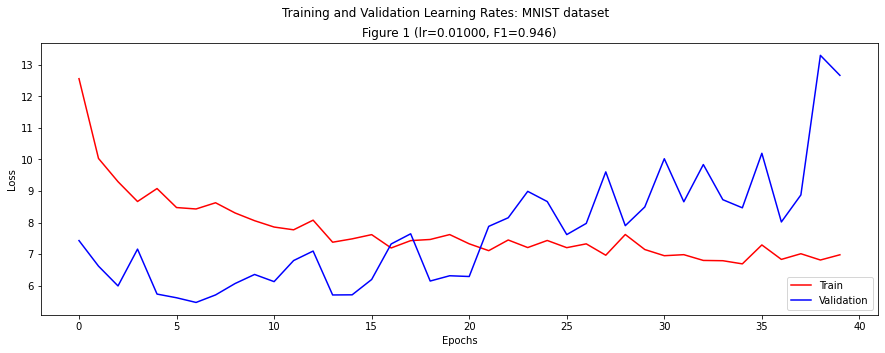

In [3]:
def run_model():
    # train the model
    executor.train()

    # test the model
    res = executor.test()

    # write a summary of the results
    res.write()

    # graph the results
    grapher = ModelResultGrapher('MNIST dataset', [15, 5])
    grapher.plot([res])
    
run_model()

train: 0.377|valid: 1.186/1.198 \/: 100%|███████████████████████████| 40/40 [03:09<00:00,  4.73s/it]


Name: Mnist
Run index: 2
Learning rate: 0.01
    train:
        started: 06/05/2020 19:18:05:368784
        ended: 06/05/2020 19:21:14:412166
        epochs: 40
        batches: 2400
        ave data points: 20.0
        average loss: 0.0008576826028267861
        min loss: 0.001982688845600933
        epoch converged: 39
        num outcomes: 1920000
        micro: F1: 0.971, precision: 0.97, recall: 0.97
        macro: F1: 0.971, precision: 0.97, recall: 0.97
    validation:
        epochs: 40
        batches: 600
        ave data points: 20.0
        average loss: 0.003278420210515873
        min loss: 0.0019502639770507812
        epoch converged: 39
        num outcomes: 480000
        micro: F1: 0.970, precision: 0.97, recall: 0.97
        macro: F1: 0.970, precision: 0.97, recall: 0.97
    test:
        started: 06/05/2020 19:21:24:291025
        ended: 06/05/2020 19:21:24:489275
        epochs: 1
        batches: 500
        ave data points: 20.0
        average loss: 0.0023176

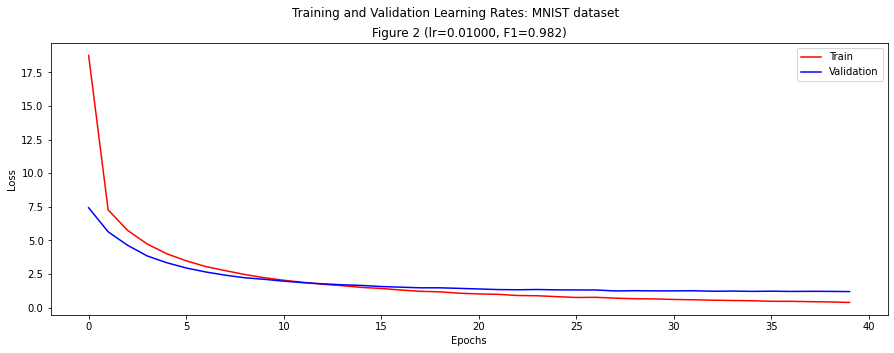

In [4]:
# for this task, the (older) stochastic gradient descent algorithm works better
executor.set_model_parameter('optimizer_class_name', 'torch.optim.SGD')
run_model()